In [ ]:
!pip install ipeadatapy
!pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import ipeadatapy as ip
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import itertools
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import date, timedelta

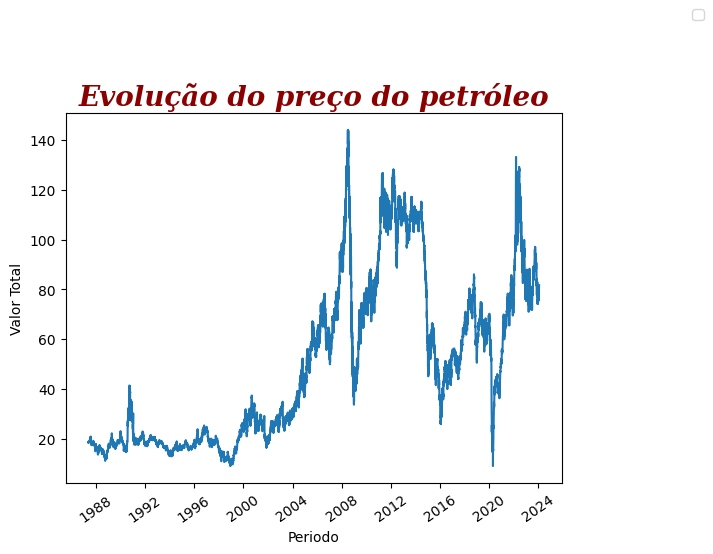

In [21]:
df = ip.metadata()
df['NAME2'] = df['NAME'].str.lower()
df = df[df['NAME2'].str.contains('petróleo')]
df = df[df['NAME2'].str.contains('preço')]
df = df[df['NAME2'].str.contains('brent')]
df = df[df['NAME2'].str.contains('fob')]
df = ip.timeseries('EIA366_PBRENT366')
df = df[df['VALUE (US$)'].notnull()]
df = df[['VALUE (US$)']]
df.rename(columns={'VALUE (US$)': 'VALOR'}, inplace = True)

plt.plot(df)
font_grafico = {'family':'serif','color':'darkred','size':20}
plt.title("Evolução do preço do petróleo", fontdict=font_grafico, weight='bold', style='italic')
plt.legend(bbox_to_anchor = (1.3, 1.3), ncol = 8)
plt.xlabel("Periodo")
plt.ylabel("Valor Total")
plt.xticks(rotation=35)
plt.show()

#Guardando a base original para uso no tableau
df_origem = df

Insights


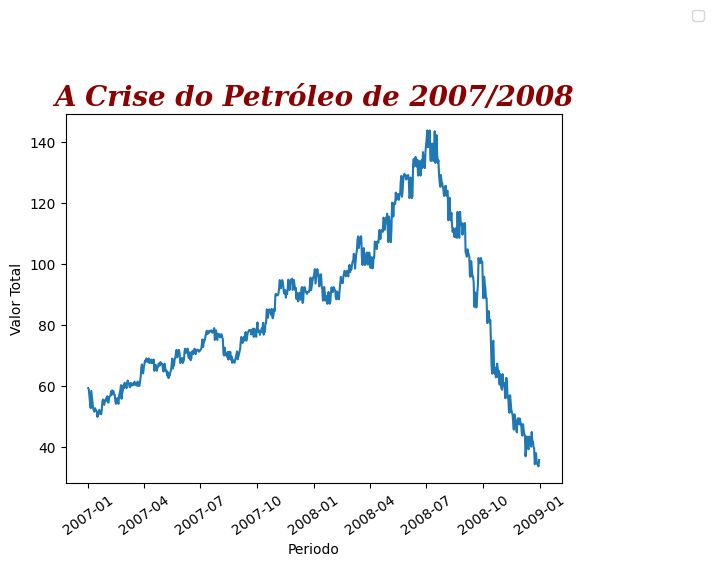

O preço do petróleo vinha aumentando de maneira continua desde 2002. Entretanto, a partir do fim de 2007 até a metade de 2008, a velocidade desse aumento cresceu consideravelmente. O preço do barril atingiu um nível nunca imaginado, ultrapassando a barreira dos US$ 150 em julho de 2008.


In [4]:
print("Insights")
df_crise = df[(df.index >= '2007-01-01') & (df.index <= '2008-12-31')]
plt.plot(df_crise)
font_grafico = {'family':'serif','color':'darkred','size':20}
plt.title("A Crise do Petróleo de 2007/2008", fontdict=font_grafico, weight='bold', style='italic')
plt.legend(bbox_to_anchor = (1.3, 1.3), ncol = 8)
plt.xlabel("Periodo")
plt.ylabel("Valor Total")
plt.xticks(rotation=35)
plt.show()
print("O preço do petróleo vinha aumentando de maneira continua desde 2002. Entretanto, a partir do fim de 2007 até a metade de 2008, a velocidade desse aumento cresceu consideravelmente. O preço do barril atingiu um nível nunca imaginado, ultrapassando a barreira dos US$ 150 em julho de 2008.")


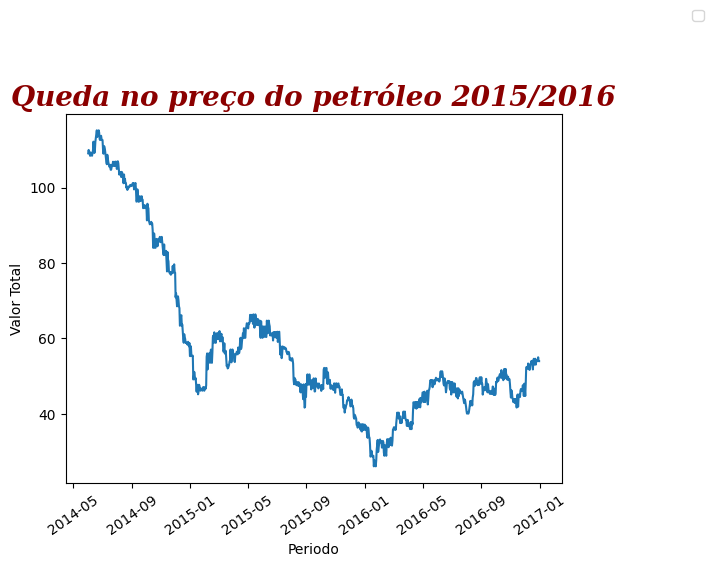

quando atingiu o menor nível desde junho de 2004, o que assustou o mercado foi um intenso e inesperado aumento nos estoques de gasolina dos Estados Unidos. Além disso, tensões geopolíticas após o anúncio de um teste de bomba de hidrogênio pela Coreia do Norte, aliadas a crescentes preocupações sobre a desaceleração da economia da China, contribuíram para o tombo dos preços
Ao mesmo tempo, a perspectiva de demanda menor da Europa e da Ásia devido ao menor crescimento da economia no mundo também vem contribuindo para a queda.
https://g1.globo.com/economia/mercados/noticia/2016/01/por-que-o-preco-do-petroleo-caiu-tanto-veja-perguntas-e-respostas.html


In [5]:
df_crise = df[(df.index >= '2014-06-01') & (df.index <= '2016-12-31')]
plt.plot(df_crise)
font_grafico = {'family':'serif','color':'darkred','size':20}
plt.title("Queda no preço do petróleo 2015/2016", fontdict=font_grafico, weight='bold', style='italic')
plt.legend(bbox_to_anchor = (1.3, 1.3), ncol = 8)
plt.xlabel("Periodo")
plt.ylabel("Valor Total")
plt.xticks(rotation=35)
plt.show()
print("quando atingiu o menor nível desde junho de 2004, o que assustou o mercado foi um intenso e inesperado aumento nos estoques de gasolina dos Estados Unidos. Além disso, tensões geopolíticas após o anúncio de um teste de bomba de hidrogênio pela Coreia do Norte, aliadas a crescentes preocupações sobre a desaceleração da economia da China, contribuíram para o tombo dos preços")
print("Ao mesmo tempo, a perspectiva de demanda menor da Europa e da Ásia devido ao menor crescimento da economia no mundo também vem contribuindo para a queda.")
print("Fonte: https://g1.globo.com/economia/mercados/noticia/2016/01/por-que-o-preco-do-petroleo-caiu-tanto-veja-perguntas-e-respostas.html")


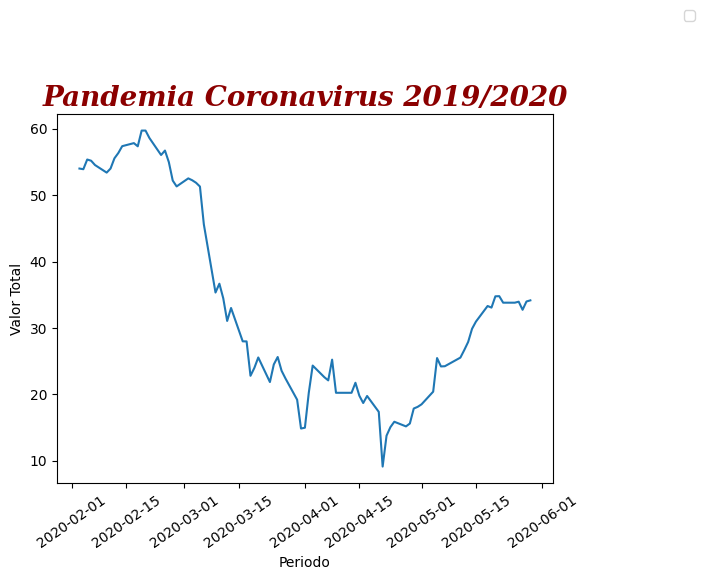

Os preços do petróleo, que já estavam em trajetória de queda em meio ao avanço do novo coronavírus, derreteram neste ano, recuando para mínimas que não eram registradas desde 1999, chegando a cair abaixo de US$ 16."
O tombo é um resultado direto da queda da demanda global, que se acentuou com as medidas de isolamento de governos para conter a pandemia e depois que a Arábia Saudita iniciou uma guerra de preços contra a Rússia."
Fonte: https://g1.globo.com/economia/noticia/2020/03/09/o-que-explica-o-tombo-do-preco-do-petroleo-e-quais-os-seus-efeitos.ghtml


In [6]:
df_crise = df[(df.index >= '2020-02-01') & (df.index <= '2020-05-31')]
plt.plot(df_crise)
font_grafico = {'family':'serif','color':'darkred','size':20}
plt.title("Pandemia Coronavirus 2019/2020", fontdict=font_grafico, weight='bold', style='italic')
plt.legend(bbox_to_anchor = (1.3, 1.3), ncol = 8)
plt.xlabel("Periodo")
plt.ylabel("Valor Total")
plt.xticks(rotation=35)
plt.show()
print("Os preços do petróleo, que já estavam em trajetória de queda em meio ao avanço do novo coronavírus, derreteram neste ano, recuando para mínimas que não eram registradas desde 1999, chegando a cair abaixo de US$ 16.\"""")
print("O tombo é um resultado direto da queda da demanda global, que se acentuou com as medidas de isolamento de governos para conter a pandemia e depois que a Arábia Saudita iniciou uma guerra de preços contra a Rússia.\"""")
print("Fonte: https://g1.globo.com/economia/noticia/2020/03/09/o-que-explica-o-tombo-do-preco-do-petroleo-e-quais-os-seus-efeitos.ghtml")

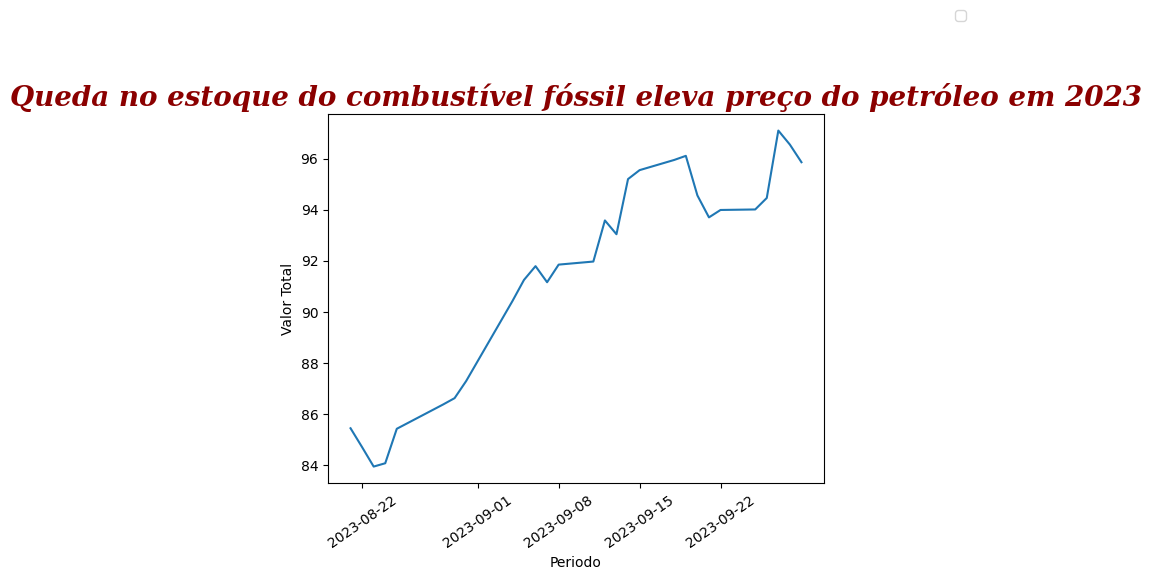

Os preços do petróleo bruto subiram quase de 3%, chegando a atingir US$ 97 por barril. Este é o valor mais alto desde agosto de 2022. A alta se deve à queda nos estoques do combustível fóssil no país. As informações são do Financial Times.
Segundo dados divulgados pela Administração de Informação de Energia norte-americana, os estoques de petróleo bruto dos Estados Unidos caíram 2,2 milhões de barris em set/23 e em contrapartida o preço registrou a maior alta. Desde o inicio do ano, os preços do petróleo nos EUA subiram  cerca de 17%.
Fonte: https://www.poder360.com.br/internacional/preco-do-petroleo-sobe-para-nivel-mais-alto-de-2023/


In [7]:
df_crise = df[(df.index >= '2023-08-20') & (df.index <= '2023-09-30')]
plt.plot(df_crise)
font_grafico = {'family':'serif','color':'darkred','size':20}
plt.title("Queda no estoque do combustível fóssil eleva preço do petróleo em 2023", fontdict=font_grafico, weight='bold', style='italic')
plt.legend(bbox_to_anchor = (1.3, 1.3), ncol = 8)
plt.xlabel("Periodo")
plt.ylabel("Valor Total")
plt.xticks(rotation=35)
plt.show()
print("Os preços do petróleo bruto subiram quase de 3%, chegando a atingir US$ 97 por barril. Este é o valor mais alto desde agosto de 2022. A alta se deve à queda nos estoques do combustível fóssil no país. As informações são do Financial Times.")
print("Segundo dados divulgados pela Administração de Informação de Energia norte-americana, os estoques de petróleo bruto dos Estados Unidos caíram 2,2 milhões de barris em set/23 e em contrapartida o preço registrou a maior alta. Desde o inicio do ano, os preços do petróleo nos EUA subiram  cerca de 17%.")
print("Fonte: https://www.poder360.com.br/internacional/preco-do-petroleo-sobe-para-nivel-mais-alto-de-2023/")

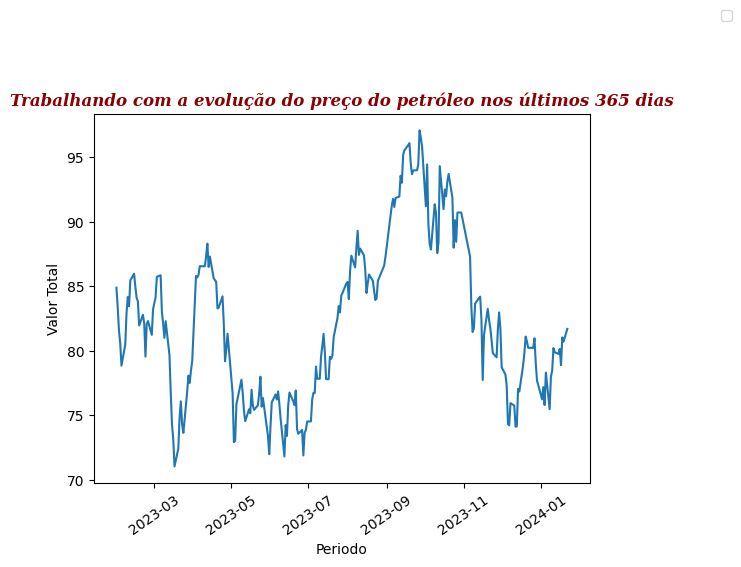

In [8]:
#Trabalhando com dados dos últimos 365 dias
dt_hoje = date.today()
dt_inicio = pd.to_datetime((dt_hoje + timedelta(-365)))
df_b = df[(df.index >= dt_inicio)]

plt.plot(df_b)
font_grafico = {'family':'serif','color':'darkred','size':12}
plt.title("Trabalhando com a evolução do preço do petróleo nos últimos 365 dias", fontdict=font_grafico, weight='bold', style='italic')
plt.legend(bbox_to_anchor = (1.3, 1.3), ncol = 8)
plt.xlabel("Periodo")
plt.ylabel("Valor Total")
plt.xticks(rotation=35)
plt.show()

In [11]:
# Dividir dados em treinamento e teste
train_size = int(len(df_b) * 0.7)
df_train, df_test = df_b[:train_size], df_b[train_size:]
print(df_train.shape)
print(df_test.shape)

(172, 1)
(74, 1)


In [12]:
def ehEstacionaria(timeseries):
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Estatistica do teste','p-value','O criterio de informação maximizado','Numero de observações usadas'])
  for key,value in dftest[4].items():
    dfoutput['Valor crítico (%s)'%key] = value

  if(dfoutput['Estatistica do teste'] < dfoutput['Valor crítico (5%)'] and dfoutput['p-value'] < 0.05):
    print('É estacionária.')
  else:
    print('Não é estacionária.')

In [13]:
def test_stationary(timeseries):

  medmov = timeseries.rolling(12).mean() #media movel
  despad = timeseries.rolling(12).std() #desvio movel

  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(medmov, color='red', label='Média móvel')
  std = plt.plot(despad, color='black', label='Desvio móvel')
  plt.legend(loc='best')
  plt.title('Média móvel e desvio padrão')
  plt.xticks(rotation=35)
  plt.show()

  print('Resultado do teste de Dickey Fuller')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Estatística do teste','p-value','O critério de informação maximizado','Numero de observações usadas'])
  for key,value in dftest[4].items():
    dfoutput['Valor crítico (%s)'%key] = value
  print(dfoutput)

  ehEstacionaria(timeseries)

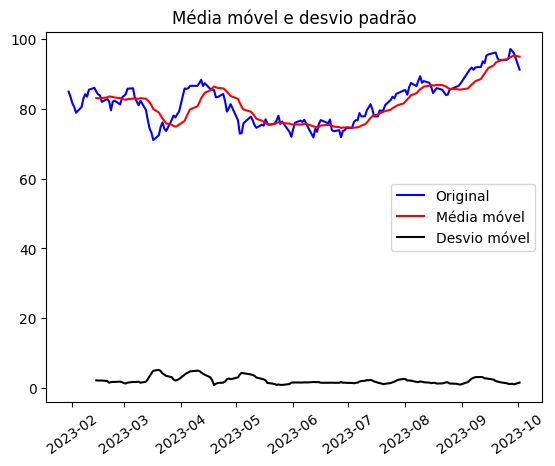

Resultado do teste de Dickey Fuller
Estatística do teste                    -1.343413
p-value                                  0.609084
O critério de informação maximizado      0.000000
Numero de observações usadas           171.000000
Valor crítico (1%)                      -3.469181
Valor crítico (5%)                      -2.878595
Valor crítico (10%)                     -2.575863
dtype: float64
Não é estacionária.


In [14]:
test_stationary(df_train['VALOR'])

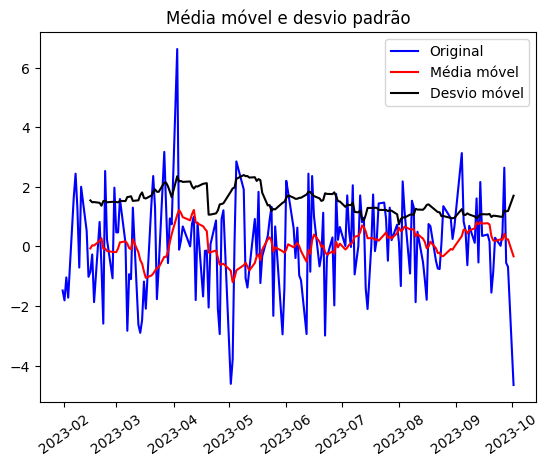

Resultado do teste de Dickey Fuller
Estatística do teste                  -1.130903e+01
p-value                                1.252296e-20
O critério de informação maximizado    0.000000e+00
Numero de observações usadas           1.700000e+02
Valor crítico (1%)                    -3.469413e+00
Valor crítico (5%)                    -2.878696e+00
Valor crítico (10%)                   -2.575917e+00
dtype: float64
É estacionária.


In [15]:
dfdiff = df_train.VALOR.diff()
dfdiff = dfdiff.dropna()
test_stationary(dfdiff)

In [16]:
#Determinando os parâmetros ARIMA
p = d = q = range(0, 6)
pdq_combinations = list(itertools.product(p, d, q))
menor_aic = float("inf")
melhor_pdq = None
warnings.filterwarnings("ignore")

In [17]:
for pdq in pdq_combinations:
    try:
        model = ARIMA(df_train['VALOR'].dropna(), order=pdq)
        results = model.fit()
        if results.aic < menor_aic:
            menor_aic = results.aic
            melhor_pdq = pdq
    except:
        continue

print('Melhor combinação pdq', melhor_pdq)

Melhor combinação pdq (5, 1, 3)


In [18]:
# Ajustando o modelo Arima com o melhor parametro pdq
modelo_arima_otimizado = ARIMA(df_b['VALOR'], order=(melhor_pdq))
modelo_arima_otimizado_fit = modelo_arima_otimizado.fit()
print(modelo_arima_otimizado_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  VALOR   No. Observations:                  246
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -476.801
Date:                Tue, 30 Jan 2024   AIC                            971.601
Time:                        00:41:13   BIC                           1003.113
Sample:                             0   HQIC                           984.291
                                - 246                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8825      0.175      5.043      0.000       0.540       1.225
ar.L2          0.3106      0.269      1.155      0.248      -0.216       0.838
ar.L3         -0.7667      0.150     -5.126      0.0

In [19]:
df_b['DATA'] = df_b.index
data_final = df_b['DATA'].iloc[-1]
datas_futuras = pd.date_range(start=data_final, periods=61, closed='right')  # 60 dias após a última data

previsoes_futuras = modelo_arima_otimizado_fit.forecast(steps=len(datas_futuras))
previsoes_futuras


246    81.319118
247    81.002693
248    80.699610
249    80.861500
250    80.942423
251    81.288695
252    81.481091
253    81.769493
254    81.811320
255    81.845459
256    81.656286
257    81.496471
258    81.238495
259    81.106976
260    80.992306
261    81.043667
262    81.126932
263    81.314871
264    81.463477
265    81.614918
266    81.659462
267    81.656350
268    81.553735
269    81.436472
270    81.291023
271    81.198140
272    81.141659
273    81.166242
274    81.229994
275    81.339573
276    81.439292
277    81.525001
278    81.556408
279    81.546452
280    81.485618
281    81.407353
282    81.321149
283    81.261140
284    81.231131
285    81.245541
286    81.289281
287    81.355822
288    81.419658
289    81.470052
290    81.489720
291    81.480474
292    81.442789
293    81.392384
294    81.340063
295    81.302624
296    81.286038
297    81.295454
298    81.324279
299    81.365443
300    81.405520
301    81.435679
302    81.447402
303    81.440279
304    81.4164

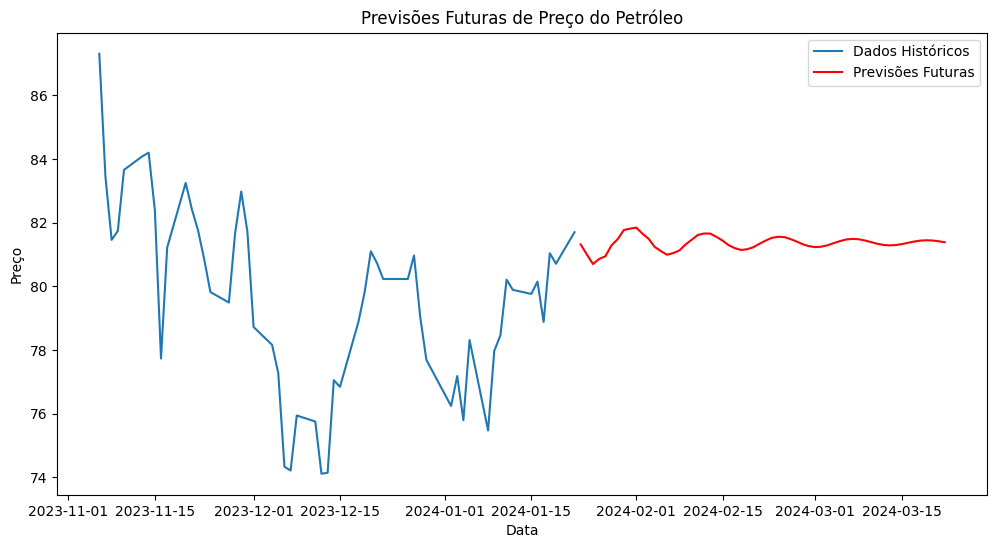

In [20]:
dt_hoje = date.today()
dt_inicio = pd.to_datetime((dt_hoje + timedelta(-90)))

df = df_b[(df_b['DATA'] >= dt_inicio)]
plt.figure(figsize=(12, 6))
plt.plot(df['DATA'], df['VALOR'], label='Dados Históricos')
plt.plot(datas_futuras, previsoes_futuras, color='red', label='Previsões Futuras')
plt.title('Previsões Futuras de Preço do Petróleo')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

In [22]:
#Gerando Arquivos que serão utilizados no tableau
previsoes_df = pd.DataFrame({
    'DATA': datas_futuras,
    'VALOR': previsoes_futuras
})

df_origem['DATA'] = df_origem.index

df_petro = df_origem[['DATA','VALOR']]
df_petro['DATA'] = np.datetime_as_string(df_petro['DATA'], unit='D')
df_petro.to_csv('BasePrecoPetroleo.csv', index=False)
previsoes_df.to_csv('previsoes_petroleo.csv', index=False)